## H2o Implementation on Vechicle Loan DataSet

### AutoML: Automatic Machine Learning


H2O’s AutoML is used for automating the machine learning workflow, which includes automatic training and tuning of many models within a user-specified time-limit. Stacked Ensembles will be automatically trained on collections of individual models to produce highly predictive ensemble models which, in most cases, will be the top performing models in the AutoML Leaderboard.

#### Starting H2O server

In [1]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.xgboost import H2OXGBoostEstimator

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 13.0.2+8, mixed mode, sharing)
  Starting server from C:\Users\spoor\AppData\Roaming\Python\Python37\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\spoor\AppData\Local\Temp\tmp2vgaxqd5
  JVM stdout: C:\Users\spoor\AppData\Local\Temp\tmp2vgaxqd5\h2o_spoor_started_from_python.out
  JVM stderr: C:\Users\spoor\AppData\Local\Temp\tmp2vgaxqd5\h2o_spoor_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_spoor_luuslo
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.963 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [2]:
target='LOAN_DEFAULT'
min_mem_size=6 
run_time=333

In [3]:
import psutil
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

4


In [4]:
import random, os, sys

# 65535 Highest port no
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:34418 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 13.0.2+8, mixed mode, sharing)
  Starting server from C:\Users\spoor\AppData\Roaming\Python\Python37\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\spoor\AppData\Local\Temp\tmpp5itqkgp
  JVM stdout: C:\Users\spoor\AppData\Local\Temp\tmpp5itqkgp\h2o_spoor_started_from_python.out
  JVM stderr: C:\Users\spoor\AppData\Local\Temp\tmpp5itqkgp\h2o_spoor_started_from_python.err
  Server is running at http://127.0.0.1:34418
Connecting to H2O server at http://127.0.0.1:34418 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_spoor_o36of6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [5]:
#Import data 

# https://s3-us-west-2.amazonaws.com/h2o-tutorials/data/topics/data/automl/loan.csv
df = h2o.import_file(path = 'trainEDA.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x

In [7]:
X=get_independent_variables(df, target) 
print(X)

['DISBURSED_AMOUNT', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'AGE_AT_DISBURSAL', 'C20', 'PERFORM_CNS_SCORE', 'ASSET_COST', 'LTV', 'EMPLOYMENT_TYPE']


In [8]:
df.columns

['DISBURSED_AMOUNT',
 'ASSET_COST',
 'LTV',
 'EMPLOYMENT_TYPE',
 'PERFORM_CNS_SCORE',
 'PRI_NO_OF_ACCTS',
 'PRI_ACTIVE_ACCTS',
 'PRI_OVERDUE_ACCTS',
 'PRI_CURRENT_BALANCE',
 'PRI_SANCTIONED_AMOUNT',
 'PRI_DISBURSED_AMOUNT',
 'PRIMARY_INSTAL_AMT',
 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
 'AVERAGE_ACCT_AGE',
 'CREDIT_HISTORY_LENGTH',
 'NO_OF_INQUIRIES',
 'LOAN_DEFAULT',
 'AGE_AT_DISBURSAL',
 'C20']

In [9]:
# Set target and predictor variables
y = target

In [10]:
y = "LOAN_DEFAULT"
x = list(df.columns).remove(y)

In [11]:
df[y] = df[y].asfactor()

### Cross-validate rather than take a test training split
Cross-validation rather than taking a test training split reduces the variance of the estimates of goodness of fit statistics. In rare cases one should take a test training split but this should be left to the expert users.

This also means the pro user can just upload the data and not worry about taking a test training split.

We can pass the original, full dataset, df (without passing a leaderboard_frame). This is a more efficient use of our data since we can use 100% of the data for training, rather than 80% or so. This time our leaderboard will use cross-validated metrics. It also gives better estimates of goodness of fit statistics.

In [14]:
aml = H2OAutoML(max_models = 20,max_runtime_secs=120, seed=1,exclude_algos = ["DeepLearning"])
aml.train(x = x, y = y, training_frame = train)

### Leaderboard
Next, we will view the AutoML Leaderboard. Since we did not specify a leaderboard_frame in the H2OAutoML.train() method for scoring and ranking the models, the AutoML leaderboard uses cross-validation metrics to rank the models.

A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric. In the case of binary classification, the default ranking metric is Area Under the ROC Curve (AUC). In the future, the user will be able to specify any of the H2O metrics so that different metrics can be used to generate rankings on the leaderboard.

In [17]:
print(aml.leaderboard)

model_id,mean_per_class_error,logloss,rmse,mse
DRF_1_AutoML_20200415_104231,0.910294,4.85614,0.469264,0.220208
XRT_1_AutoML_20200415_104231,0.910629,6.37189,0.496028,0.246044
GBM_5_AutoML_20200415_104231,0.912889,1.66101,0.778877,0.60665
GBM_3_AutoML_20200415_104231,0.912938,1.46923,0.731659,0.535326
GBM_4_AutoML_20200415_104231,0.91343,1.67271,0.780666,0.60944
GBM_1_AutoML_20200415_104231,0.913589,1.5884,0.760777,0.578782
GBM_2_AutoML_20200415_104231,0.914163,1.58352,0.760587,0.578493
GBM_grid__1_AutoML_20200415_104231_model_2,0.916142,0.837755,0.503028,0.253037
StackedEnsemble_BestOfFamily_AutoML_20200415_104231,0.916252,0.602842,0.407807,0.166306
StackedEnsemble_AllModels_AutoML_20200415_104231,0.916663,0.600596,0.407583,0.166124


In [34]:
best_model = h2o.get_model(aml.leaderboard[2,'model_id'])

In [35]:
best_model.algo

'gbm'

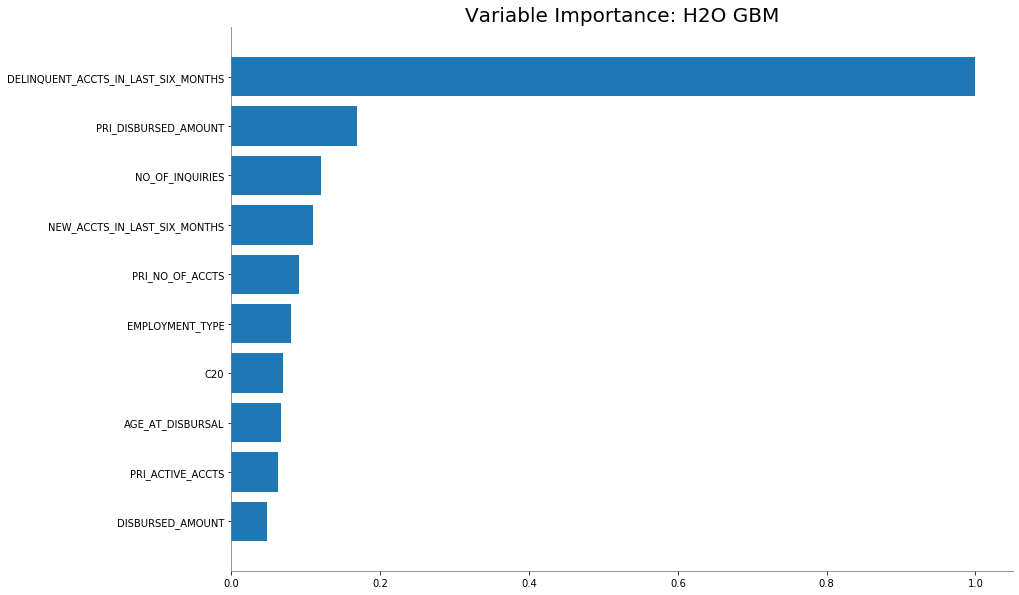

In [36]:
best_model.varimp_plot()

In [37]:
aml.leader

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_1_AutoML_20200415_104231


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,1.0,23.0,267895.0,1.0,20.0,13.565217,2.0,7661.0,920.65216




ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.2551362505831677
RMSE: 0.5051101370821691
LogLoss: 6.714979386145638
Mean Per-Class Error: 0.7043686913852222

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,23,28,36,Error,Rate
0,23186.0,1465.0,473.0,211.0,63.0,19.0,21.0,10.0,4.0,2.0,...,209.0,0.0,0.0,775.0,0.0,0.0,0.0,0.0,0.124561,"3,299 / 26,485"
1,3005.0,556.0,161.0,52.0,24.0,11.0,6.0,3.0,2.0,1.0,...,42.0,0.0,0.0,196.0,0.0,0.0,0.0,0.0,0.863525,"3,518 / 4,074"
2,761.0,163.0,54.0,16.0,9.0,5.0,2.0,3.0,0.0,0.0,...,8.0,0.0,0.0,53.0,0.0,0.0,0.0,0.0,0.950276,"1,032 / 1,086"
3,249.0,64.0,18.0,5.0,3.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.986486,365 / 370
4,118.0,31.0,14.0,6.0,0.0,1.0,2.0,1.0,1.0,0.0,...,4.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.000000,188 / 188
5,53.0,12.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.000000,79 / 79
6,30.0,7.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.980000,49 / 50
7,19.0,6.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.000000,33 / 33
8,18.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.000000,25 / 25
9,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.000000,9 / 9



See the whole table with table.as_data_frame()

Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.734244
1,2,0.808033
2,3,0.843200
3,4,0.865595
4,5,0.876515
5,6,0.877595
6,7,0.877718
7,8,0.877718
8,9,0.877718
9,10,0.877718



ModelMetricsMultinomial: drf
** Reported on cross-validation data. **

MSE: 0.22020836566285254
RMSE: 0.46926364195711195
LogLoss: 4.8561417541995295
Mean Per-Class Error: 0.9102941704895303

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,23,28,36,Error,Rate
0,65715.0,3389.0,853.0,282.0,118.0,51.0,78.0,18.0,17.0,6.0,...,228.0,61.0,0.0,923.0,1.0,0.0,0.0,0.0,0.085386,"6,135 / 71,850"
1,8522.0,1598.0,335.0,90.0,42.0,17.0,29.0,11.0,5.0,2.0,...,66.0,12.0,0.0,260.0,0.0,0.0,1.0,0.0,0.855267,"9,443 / 11,041"
2,2220.0,418.0,118.0,38.0,23.0,10.0,12.0,2.0,2.0,3.0,...,16.0,2.0,0.0,60.0,0.0,0.0,0.0,0.0,0.959986,"2,831 / 2,949"
3,708.0,168.0,43.0,22.0,12.0,7.0,3.0,0.0,2.0,0.0,...,4.0,1.0,0.0,23.0,1.0,0.0,0.0,0.0,0.978066,"981 / 1,003"
4,340.0,70.0,20.0,11.0,6.0,6.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.987207,463 / 469
5,136.0,45.0,12.0,11.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.995434,218 / 219
6,87.0,32.0,8.0,1.0,3.0,0.0,2.0,1.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.985714,138 / 140
7,53.0,16.0,4.0,3.0,2.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,80 / 80
8,50.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.000000,67 / 67
9,19.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,23 / 23



See the whole table with table.as_data_frame()

Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.767460
1,2,0.851950
2,3,0.878741
3,4,0.895931
4,5,0.904053
5,6,0.905976
6,7,0.906408
7,8,0.906465
8,9,0.906465
9,10,0.906465



Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.76746017,0.03324191,0.72766054,0.73465675,0.79085374,0.7910694,0.7930603
1,err,0.23253985,0.03324191,0.27233946,0.26534328,0.20914623,0.2089306,0.2069397
2,err_count,4088.2,584.5029,4788.0,4665.0,3677.0,3673.0,3638.0
3,logloss,4.856111,1.8255134,6.869699,6.8412075,3.5766711,3.477267,3.5157099
4,max_per_class_error,1.0,0.0,1.0,1.0,1.0,1.0,1.0
5,mean_per_class_accuracy,0.3395447,0.028121032,0.3373733,0.37866065,0.34261894,0.33976153,0.29930913
6,mean_per_class_error,0.6604553,0.028121032,0.6626267,0.6213394,0.65738106,0.6602385,0.70069087
7,mse,0.22020783,0.03238767,0.25707394,0.25424477,0.19689201,0.1953369,0.19749151
8,r2,0.6972094,0.058882236,0.62237597,0.64629215,0.7544696,0.7365367,0.7263726
9,rmse,0.46826923,0.034127556,0.5070246,0.5042269,0.44372517,0.44196934,0.44440016



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error
0,,2020-04-15 10:43:02,10.397 sec,0.0,NaN,NaN,NaN
1,,2020-04-15 10:43:03,11.530 sec,1.0,0.50511,6.714979,0.265756



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,1814.567017,1.000000,0.140895
1,DISBURSED_AMOUNT,1204.520142,0.663806,0.093527
2,EMPLOYMENT_TYPE,1083.676758,0.597210,0.084144
3,C20,1043.679199,0.575167,0.081038
4,ASSET_COST,946.656128,0.521698,0.073505
5,LTV,936.955078,0.516352,0.072752
6,NO_OF_INQUIRIES,830.203735,0.457522,0.064463
7,PRI_DISBURSED_AMOUNT,745.546326,0.410867,0.057889
8,CREDIT_HISTORY_LENGTH,710.431946,0.391516,0.055163
9,PRI_ACTIVE_ACCTS,539.096252,0.297094,0.041859


### GBM

In [97]:
# split into training and test for showing how to predict
train, test = df.split_frame([0.8])

In [99]:
df["LOAN_DEFAULT"]= df["LOAN_DEFAULT"].asfactor()

In [41]:
gbm_model = H2OGradientBoostingEstimator(stopping_metric="logloss",
                                         stopping_rounds= 3,  # early stopping
                                         score_tree_interval=5,
                                         ntrees=500,
                                         model_id="gbm",
                                         nfolds=5,
                                         seed=25,
                                         fold_assignment='stratified')
gbm_model.train(x=predictors,
                y="LOAN_DEFAULT",
                training_frame=train,
                validation_frame=test)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


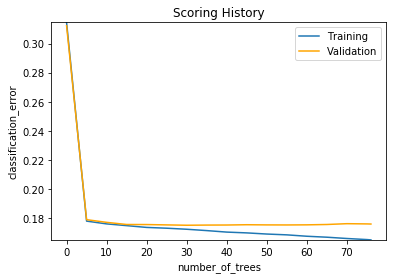

In [42]:
%matplotlib inline
gbm_model.plot()

In [73]:
gbm_model.mse()

0.1489944389316194

### Random Forest

In [44]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
rf = H2ORandomForestEstimator(seed=1)

In [45]:
rf.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [46]:
y_hat = rf.predict(test_data=test)

drf prediction progress: |████████████████████████████████████████████████| 100%


In [47]:
y_hat

predict,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p23,p28,p36
0,0.896194,0.0843494,0.0193747,0,0,0,0,1.47339e-05,3.29994e-06,2.44549e-06,9.96898e-07,2.27367e-06,0,4.85366e-06,5.15009e-07,1.79027e-06,3.06135e-06,7.81245e-06,2.91015e-05,6.37473e-06,3.31406e-06,8.24106e-07,6.02932e-07,0
0,0.731364,0.114004,0.0927197,0,0.0370879,0,0,0,1.51776e-06,0.0185463,1.29651e-06,1.55874e-06,0,3.23154e-06,0.0061846,1.09331e-06,5.64713e-06,7.52197e-06,2.77295e-05,1.32199e-05,5.96552e-06,1.48601e-05,3.26651e-06,6.05201e-06
0,0.706495,0.193411,0.0640538,0.0179835,0,0,0.0179835,0,1.47188e-06,0,1.25732e-06,1.51163e-06,0,2.17545e-06,4.80874e-07,2.81373e-06,4.37129e-06,7.29463e-06,2.68915e-05,4.59877e-06,4.71238e-06,5.55429e-06,3.16778e-06,6.88057e-06
0,0.865701,0.0877553,0.0266112,0,0.0198611,0,0,6.41335e-06,0,0,1.02801e-06,6.75168e-07,4.05514e-06,5.00512e-06,5.31081e-07,1.84614e-06,3.95698e-07,9.18476e-06,3.00097e-05,5.07892e-06,3.41748e-06,3.03765e-06,6.21747e-07,0
0,0.931794,0.0589926,0.00736599,0.00176714,0,0,0,0,1.59098e-06,2.46815e-06,0,1.63394e-06,0,8.40274e-07,5.19783e-07,1.14606e-06,5.91956e-06,7.88486e-06,2.90673e-05,1.38577e-05,5.02761e-06,3.86242e-06,4.38279e-06,1.88279e-06
0,0.93956,0.0393224,0,0.0210408,0,0,0,0,1.72211e-06,2.67159e-06,0,1.76862e-06,0,2.5453e-06,5.62626e-07,1.24052e-06,3.13353e-06,8.53477e-06,3.14632e-05,6.96413e-06,6.76876e-06,4.18078e-06,3.70633e-06,1.99619e-06
0,0.362089,0.237862,0.338084,0.0242622,0.0024627,0.0233957,0.0116978,0,0,0,0,0,1.0854e-05,2.83017e-06,6.25595e-07,3.66053e-06,2.66874e-06,1.08193e-05,4.96509e-05,6.16303e-06,2.89837e-05,5.31306e-06,2.03484e-05,3.53549e-06
0,0.936928,0.0414245,0.021574,0,0,0,0,0,1.66766e-06,0,0,1.71269e-06,0,8.80774e-07,3.60958e-06,1.2013e-06,4.37972e-06,8.2649e-06,3.04683e-05,6.74392e-06,5.26993e-06,4.04858e-06,3.80952e-06,1.47108e-06
0,0.587688,0.314064,0.0429065,0.0448705,0.0103899,0,0,6.71003e-06,1.85958e-06,4.96569e-06,0,7.06401e-07,1.40976e-06,3.62118e-06,5.55648e-07,3.95765e-06,2.85976e-06,9.60964e-06,3.13979e-05,5.47395e-06,3.57557e-06,8.89135e-07,1.67536e-06,2.15233e-06
0,0.939848,0.0530892,0.00527776,0.00168497,0,0,0,1.28657e-05,0,5.05856e-06,0,2.49896e-06,1.43613e-06,2.56074e-06,3.75007e-06,7.19613e-07,4.08415e-06,8.58657e-06,3.16541e-05,1.44805e-05,3.64244e-06,3.18726e-06,4.43705e-06,1.00198e-06


In [48]:
rf_performance = rf.model_performance(test)
print(rf_performance)


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.1682875563387675
RMSE: 0.4102286634777822
LogLoss: 0.7756793337525619
Mean Per-Class Error: 0.7457078858342352

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,23,28,36,Error,Rate
0,20408.0,118.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005894,"121 / 20,529"
1,2819.0,316.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.899235,"2,820 / 3,136"
2,780.0,73.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.991860,853 / 860
3,262.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,285 / 285
4,120.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,122 / 122
5,54.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,57 / 57
6,48.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,53 / 53
7,23.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,24 / 24
8,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,11 / 11
9,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,10 / 10



See the whole table with table.as_data_frame()

Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.825673
1,2,0.939103
2,3,0.970567
3,4,0.983471
4,5,0.988330
5,6,0.990680
6,7,0.991756
7,8,0.992233
8,9,0.992433
9,10,0.992552


In [74]:

rf_performance.confusion_matrix()


Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,23,28,36,Error,Rate
0,20408.0,118.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005894,"121 / 20,529"
1,2819.0,316.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.899235,"2,820 / 3,136"
2,780.0,73.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.991860,853 / 860
3,262.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,285 / 285
4,120.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,122 / 122
5,54.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,57 / 57
6,48.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,53 / 53
7,23.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,24 / 24
8,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,11 / 11
9,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,10 / 10



See the whole table with table.as_data_frame()


In [112]:
# Getting a model directly by name

aml_leaderboard_df.head()

,model_id,mean_per_class_error,logloss,rmse,mse
0,DRF_1_AutoML_20200415_104231,0.910294,4.856142,0.469264,0.220208
1,XRT_1_AutoML_20200415_104231,0.910629,6.371889,0.496028,0.246044
2,GBM_5_AutoML_20200415_104231,0.912889,1.661013,0.778877,0.606650
3,GBM_3_AutoML_20200415_104231,0.912938,1.469228,0.731659,0.535326
4,GBM_4_AutoML_20200415_104231,0.913430,1.672710,0.780666,0.609440
